In [ ]:
using Pkg
Pkg.activate("env")
Pkg.add("Colors")

  Activating project at `~/Developer/Overdamped To Underdamped Langevin Limits/AB_C_V`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Developer/Overdamped To Underdamped Langevin Limits/AB_C_V/Project.toml`
  No Changes to `~/Developer/Overdamped To Underdamped Langevin Limits/AB_C_V/Manifest.toml`


In [2]:
using CSV, DataFrames
using Statistics, Distributions
using Plots, Colors

In [7]:
ABCX_per_path = "results/ABCX_per_sim11000.csv"
ABCX_per_df = CSV.read(ABCX_per_path, DataFrame)

ABCV_beta_n5_path = "results/ABCV_sim11000_beta1.0e-5.csv"
ABCV_df_beta_n5 = CSV.read(ABCV_beta_n5_path, DataFrame)

ABCV_beta_n4_path = "results/ABCV_sim10000_beta0.0001_Δt1.0e-7.csv"
ABCV_df_beta_n4 = CSV.read(ABCV_beta_n4_path, DataFrame)

ABCV_beta_n3_path = "results/ABCV_sim10000_beta0.001_Δt1.0e-7.csv"
ABCV_df_beta_n3 = CSV.read(ABCV_beta_n3_path, DataFrame)

ABCV_beta_n2_path = "results/ABCV_sim10000_beta0.01_Δt1.0e-7.csv"
ABCV_df_beta_n2 = CSV.read(ABCV_beta_n2_path, DataFrame)

ABCV_beta_n1_path = "results/ABCV_sim10000_beta0.1_Δt1.0e-7.csv"
ABCV_df_beta_n1 = CSV.read(ABCV_beta_n1_path, DataFrame)

ABCV_beta1_path = "results/ABCV_sim11000_beta1.0.csv"
ABCV_df_beta1 = CSV.read(ABCV_beta1_path, DataFrame)

println(ABCX_per_df[1:10, :])

10×2 DataFrame
 Row │ mean      std        
     │ Float64   Float64    
─────┼──────────────────────
   1 │ 1.0       0.0
   2 │ 0.999909  0.00953463
   3 │ 0.999727  0.016513
   4 │ 0.999091  0.0301388
   5 │ 0.998818  0.0343588
   6 │ 0.998273  0.0415264
   7 │ 0.998273  0.0415264
   8 │ 0.997909  0.0456807
   9 │ 0.997818  0.0466611
  10 │ 0.997727  0.0476211


In [8]:
# Parameters
const DIM = 3          # dim of the domain

p = (;
    Ω_inf=0.0,       # nm
    Ω_sup=20.0,      # nm
    T=0.5,           # s 0.5
    Δt=1.0e-8,       # s 1.0e-8
    C₀=1.25e-4,      # nm^{-3}
    λ=40.5745,       # 1/s, varies based on Ω
    β=17.3,          # 1/s
    ε=10.0,          # nm
    γ=0.5,           # ratio
    D=1.0e6,         # nm
)
p = (; p..., δ=sqrt(2 * p.D * p.Δt))

(Ω_inf = 0.0, Ω_sup = 20.0, T = 0.5, Δt = 1.0e-8, C₀ = 0.000125, λ = 40.5745, β = 17.3, ε = 10.0, γ = 0.5, D = 1.0e6, δ = 0.1414213562373095)

In [9]:
num_time_steps = Int(floor(p.T / p.Δt))

50000000

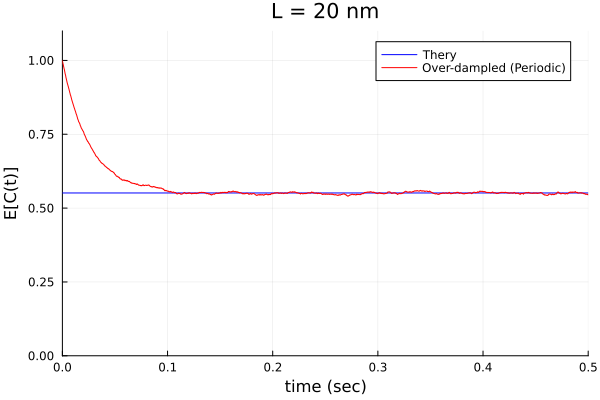

In [33]:
scale = 10

indices = 1:(1000 * scale):(num_time_steps+1)
time_steps = p.Δt * collect(0:num_time_steps)
t_steps = time_steps[indices]

ref_line = fill(0.5512, length(t_steps))
plot(t_steps, ref_line,
      label="Thery",
      xlabel="time (sec)",
      ylabel="E[C(t)]",
      title="L = 20 nm",
      color="blue")
plot!(t_steps, ABCX_per_df.mean[1:scale:length(ABCX_per_df.mean)],
      label="Over-dampled (Periodic)",
      color="red")

ylims!(0.0, 1.1)
xlims!(0.0, p.Δt * num_time_steps)

display(plot!())

In [6]:
size(ABCV_df_betan4)

(5001, 1)

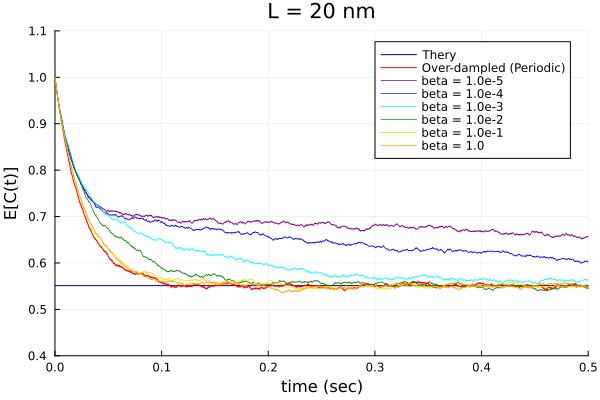

In [25]:
time_steps = p.Δt * collect(0:num_time_steps)

indices = 1:1000:(num_time_steps+1)
t_steps = time_steps[indices] 

indices2 = 1:10000:(num_time_steps+1)
t_steps2 = time_steps[indices2]

ref_line = fill(0.5512, length(t_steps))
plot(t_steps, ref_line,
      label="Thery",
      xlabel="time (sec)",
      ylabel="E[C(t)]",
      title="L = 20 nm",
      color="navyblue")

plot!(t_steps, ABCX_per_df.mean,
      label="Over-dampled (Periodic)",
      color="red")

plot!(t_steps, ABCV_df_beta_n5.mean,
      label="beta = 1.0e-5",
      color="purple",
      linewidth=0.7)

plot!(t_steps2, ABCV_df_beta_n4.mean,
      label="beta = 1.0e-4",
      color="blue",
      linewidth=0.7)

plot!(t_steps2, ABCV_df_beta_n3.mean,
      label="beta = 1.0e-3",
      color="cyan",
      linewidth=0.7)

plot!(t_steps2, ABCV_df_beta_n2.mean,
      label="beta = 1.0e-2",
      color="green",
      linewidth=0.7)

plot!(t_steps2, ABCV_df_beta_n1.mean,
      label="beta = 1.0e-1",
      color="gold",
      linewidth=0.7)

plot!(t_steps, ABCV_df_beta1.mean,
      label="beta = 1.0",
      color="orange",
      linewidth=0.7)

# num_sim = 11000
#z_crit = quantile(Normal(0, 1), 0.975) # 0.975 for two-tailed 95% CI
#margin_of_error = z_crit .* (df.std ./ sqrt(num_sim))
# Confidence interval
#lower_bound = df.mean .- margin_of_error
#upper_bound = df.mean .+ margin_of_error

#plot!(t_steps, upper_bound, 
#      label=false, color=:grey, linestyle=:dash)
#plot!(t_steps, lower_bound, 
#      label=false, color =:grey, linestyle=:dash)

# Fill the region between the upper and lower bounds
#plot!(time, upper_bound, fillrange=lower_bound, fillalpha=0.3, color=:gray)

ylims!(0.4, 1.1)
xlims!(0.0, p.Δt * num_time_steps)

display(plot!())